In [1]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 393.8 kB/s eta 0:01:38
   ---------------------------------------- 0.0/38.6 MB 393.8 kB/s eta 0:01:38
   ---------------------------------------- 0.0/38.6 MB 393.8 kB/s eta 0:01:38
   ---------------------------------------- 0.0/38.6 MB 393.8 kB/s eta 0:01:38
   ---------------------------------------- 0.0/38.6 MB 393.8 kB/s eta 0:01:38
   ----------------------

In [12]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display, Javascript
from base64 import b64decode

In [14]:
def cv2_imshow(img):
    cv2.imshow('image', img)
    cv2.waitKey(0)  # Wait for a key press to close the window
    cv2.destroyAllWindows()
    
def capture_image():
    cap = cv2.VideoCapture(0)  # 0 is the default camera
    success, frame = cap.read()
    if success:
        cv2.imshow('Captured Image', frame)
        cv2.waitKey(0)  # Wait for a key press to close the window
        cv2.imwrite('output.jpg', frame)  # Save the frame as JPEG file
    cap.release()
    cv2.destroyAllWindows()


In [15]:
import ipywidgets as widgets
from IPython.display import display

# fileupload widget
uploader = widgets.FileUpload(
    accept='.pb, .pbtxt',  #accepted file types
    multiple=True  # multiple files
)
display(uploader)

# handle file uploads
def handle_upload(change):
    for filename, file_info in uploader.value.items():
        print(f"Filename: {filename}")
        # access file content
        content = file_info['content']
        with open(filename, 'wb') as f:
            f.write(content)
        print(f"{filename} has been saved successfully.")

# Attach the event handler to the uploader
uploader.observe(handle_upload, names='value')


FileUpload(value=(), accept='.pb, .pbtxt', description='Upload', multiple=True)

In [16]:
pb_file = 'C:\\Users\\merva\\OneDrive\\Desktop\\uni\\AI\\deep learnning\\opencv_face_detector_uint8.pb'
pbtxt_file = 'C:\\Users\\merva\\OneDrive\\Desktop\\uni\\AI\\deep learnning\\opencv_face_detector.pbtxt'

In [17]:
# Load the OpenCV face detector model
net = cv2.dnn.readNetFromTensorflow(pb_file, pbtxt_file)

In [23]:

def take_photo(filename='photo.jpg'):
    # Start the camera
    cap = cv2.VideoCapture(0)
    
    # Check if the camera opened successfully
    if not cap.isOpened():
        print("Cannot open camera")
        return None
        

    else:
       
    
        print("Press 's' to save the photo and quit, or 'q' to quit without saving.")
    
        while True:
            # Capture frame-by-frame
            ret, frame = cap.read()
        
            # if frame is read correctly ret is True
            if not ret:
                print("Can't receive frame (stream end?). Exiting ...")
                break
        
            # Display the resulting frame
            cv2.imshow('Camera', frame)
        
            key = cv2.waitKey(1)
            if key == ord('s'):
            # Save the frame as a JPEG file
                cv2.imwrite(filename, frame)
                print(f"Photo saved as {filename}")
                break
            elif key == ord('q'):
                print("Exiting without saving.")
                break
    
        # When everything done, release the capture
        cap.release()
        cv2.destroyAllWindows()
        return filename




In [24]:
# Function to perform face detection on a static photo
def detect_faces(net, frame):
    # Perform face detection
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), [104., 177., 123.], False, False)
    net.setInput(blob)
    detections = net.forward()

    # Process the detections
    for i in range(0, detections.shape[2]):
        # Get the confidence (probability) of the current detection:
        confidence = detections[0, 0, i, 2]
        # Only consider detections if confidence is greater than a fixed minimum confidence:
        if confidence > 0.7:
            # Get the coordinates of the current detection:
            box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
            (startX, startY, endX, endY) = box.astype("int")
            # Draw the detection and the confidence:
            text = "{:.3f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY), (255, 0, 0), 3)
            cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Display the result
    cv2_imshow(frame)


Press 's' to save the photo and quit, or 'q' to quit without saving.
Photo saved as photo.jpg
Saved to photo.jpg


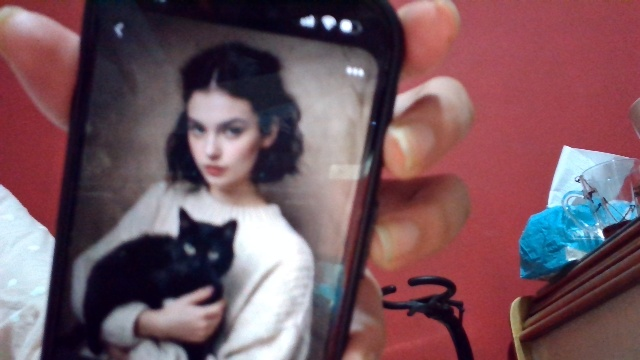

In [27]:

import numpy as np
from IPython.display import Image
from PIL import Image as PIL_Image
from io import BytesIO

try:
    # Capture the photo
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Load the image using PIL
    img_pil = PIL_Image.open(filename)

    # Convert PIL Image to NumPy array
    img_np = np.array(img_pil)

    # Show the image which was just taken.
    display(Image(filename))

except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))


In [28]:
detect_faces(net, img_np)